Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


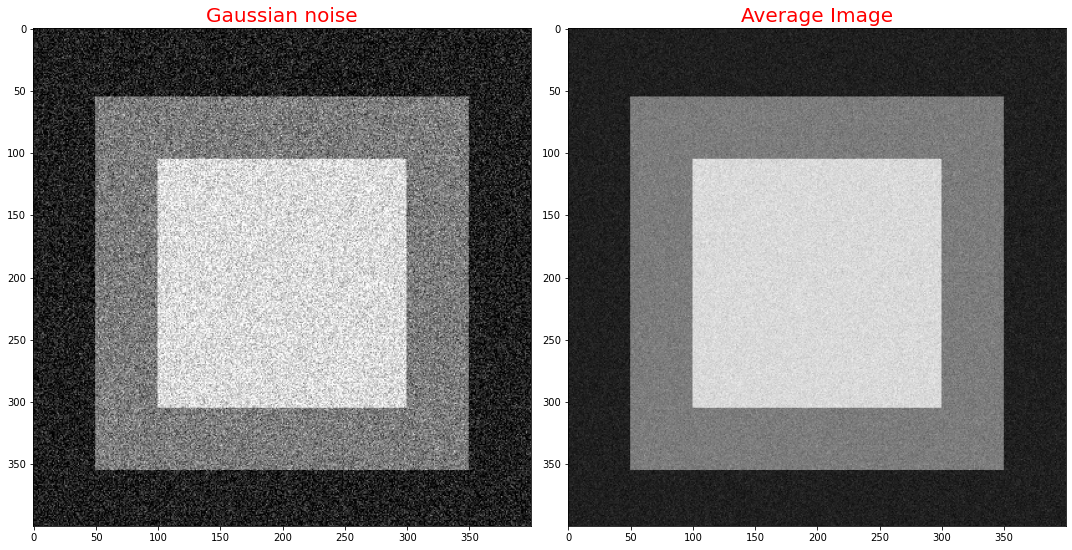

平均影像中雜訊的標準差 : 75.42777512217786


In [ ]:
import numpy as np
import cv2
import math
from numpy.random import uniform, normal, exponential, rayleigh
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
from scipy import ndimage
drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/Pattern.bmp")

def gaussian_noise(f, scale):
  g = f.copy()
  nr, nc = f.shape[:2]
  for x in range(nr):
    for y in range(nc):
      value = f[x, y] + normal(0, scale)
      g[x, y] = np.uint8(np.clip(value, 0, 255))
  return g

gaus1=gaussian_noise(img,30)
gaus2=gaussian_noise(img,30)
gaus3=gaussian_noise(img,30)
gaus4=gaussian_noise(img,30)
gaus5=gaussian_noise(img,30)
gaus6=gaussian_noise(img,30)
gaus7=gaussian_noise(img,30)
gaus8=gaussian_noise(img,30)
gaus9=gaussian_noise(img,30)
gaus10=gaussian_noise(img,30)

image=[gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8, gaus9, gaus10]
avg_img = np.mean(image, axis = 0)
avg_img = avg_img.astype(np.uint8)

images = [gaus1, avg_img]
titles = ["Gaussian noise", "Average Image"]

plt.figure(figsize = (15, 10))

for i in range(2):
  plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
  plt.title(titles[i], fontsize = 20, color = 'r')
  
plt.tight_layout()
plt.show()

print("平均影像中雜訊的標準差 :",ndimage.standard_deviation(avg_img))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


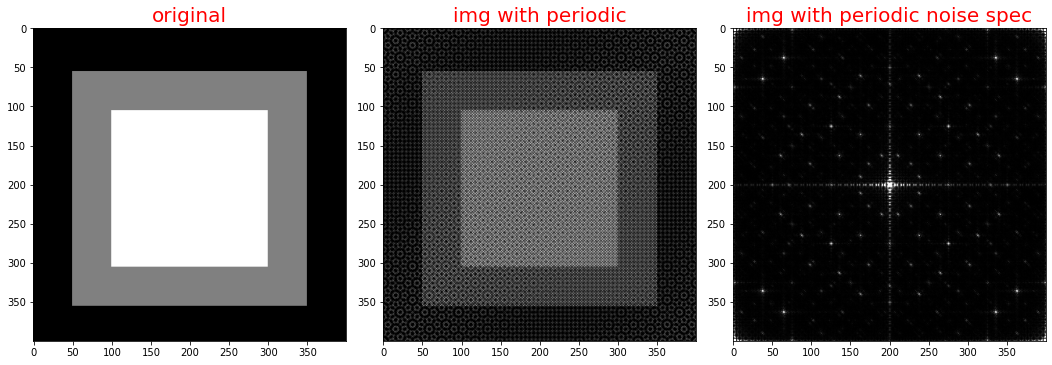

In [32]:
import numpy as np
import cv2
import math
from numpy.random import uniform, normal, exponential, rayleigh
from numpy.fft import fft2,ifft2,fftshift
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/Pattern.bmp",-1)

def fourier_sp(f):
  F = fft2(f)
  Fshift = fftshift(F)
  mag = np.abs(Fshift)
  mag = mag / mag.max() * 255.0 * 100.0
  g = np.uint8(np.clip(mag, 0, 255))
  return g

def periodic(f, scale, frequency, angle):
  g = f.copy()
  nr,nc = f.shape[:2]
  fp = np.zeros([nr, nc])
  for x in range(nr):
    for y in range(nc):
      fp[x, y] = (-1 ** (x + y)) * f[x,y]

  F = fft2(fp)
  G = F.copy()

  magnitude = np.sum(F) * scale
  for theta in range(0, 360, angle):
    u = int(frequency * np.cos(theta * np.pi / 180) + nr / 2)
    v = int(frequency * np.sin(theta * np.pi / 180) + nc / 2)
    G[u,v]=magnitude

  gp = ifft2(G)
  gp2 = np.zeros([nr,nc])

  for x in range(nr):
    for y in range(nc):
      gp2[x, y] = round((-1 ** (x + y)) * np.real(gp[x, y]), 0)
  
  g = np.uint8(np.clip(gp2, 0, 255))
  return g

img_noise = periodic(img, 0.5, 75,  30)
img_spec = fourier_sp(img_noise)

images = [img, img_noise, img_spec]
titles = ['original','img with periodic','img with periodic noise spec']
plt.figure(figsize=(15,15))

for i in range(3):
  plt.subplot(1, 3, i + 1), plt.imshow(images[i], 'gray')
  plt.title(titles[i], fontsize = 20, color = 'r')

plt.tight_layout()
plt.show()